In [1]:
!pip install scikit-learn pandas --upgrade --quiet

In [2]:
import pandas as pd

In [3]:
raw_df = pd.read_csv('weatherAUS.csv')

In [4]:
raw_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32892,2015-10-07,Sydney,19.7,21.5,0.0,13.2,1.3,SSW,67.0,SSE,SE,39.0,26.0,61.0,56.0,1029.6,1033.6,5.0,7.0,20.3,19.0,No,No
32893,2015-10-08,Sydney,17.0,21.1,0.0,6.6,2.2,ENE,35.0,ESE,E,13.0,20.0,53.0,57.0,1038.8,1036.0,7.0,7.0,18.5,19.9,No,No
32894,2015-10-09,Sydney,16.8,22.7,0.0,5.4,8.7,ENE,43.0,N,NE,15.0,24.0,51.0,51.0,1034.4,1029.7,7.0,5.0,20.1,22.0,No,No
32895,2015-10-10,Sydney,15.7,24.3,0.0,6.8,9.5,E,24.0,SE,E,2.0,17.0,62.0,60.0,1028.9,1025.8,1.0,4.0,21.2,22.3,No,No


In [21]:
raw_df.shape

(31864, 23)

In [5]:
raw_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32897 entries, 0 to 32896
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           32897 non-null  object 
 1   Location       32897 non-null  object 
 2   MinTemp        32398 non-null  float64
 3   MaxTemp        32527 non-null  float64
 4   Rainfall       32210 non-null  float64
 5   Evaporation    13825 non-null  float64
 6   Sunshine       9380 non-null   float64
 7   WindGustDir    28030 non-null  object 
 8   WindGustSpeed  28034 non-null  float64
 9   WindDir9am     28429 non-null  object 
 10  WindDir3pm     30797 non-null  object 
 11  WindSpeed9am   32068 non-null  float64
 12  WindSpeed3pm   31422 non-null  float64
 13  Humidity9am    32231 non-null  float64
 14  Humidity3pm    31567 non-null  float64
 15  Pressure9am    26213 non-null  float64
 16  Pressure3pm    26217 non-null  float64
 17  Cloud9am       17086 non-null  float64
 18  Cloud3

In [7]:
raw_df.dropna(subset = ['RainToday', 'RainTomorrow'], inplace = True)

In [8]:
!pip install plotly matplotlib seaborn --quiet

In [11]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid')
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#00000000'

In [12]:
px.histogram(raw_df, x = 'Location', title = 'Location vs Rain Today', color = 'RainToday')

In [13]:
px.histogram(raw_df,
             x= 'Temp3pm',
             title='Temp at 3pm vs RainTomorrow',
             color = 'RainTomorrow')

In [15]:
px.histogram(raw_df,
             x = 'RainTomorrow',
             color = 'RainToday',
             title ='RainTomorrow vs RainToday')

In [16]:
px.scatter(raw_df.sample(2000), 
           title='Min Temp. vs Max Temp.',
           x='MinTemp', 
           y='MaxTemp', 
           color='RainToday')

In [17]:
px.scatter(raw_df.sample(2000), 
           title='Temp (3 pm) vs. Humidity (3 pm)',
           x='Temp3pm',
           y='Humidity3pm',
           color='RainTomorrow')

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
train_val_df, test_df = train_test_split(raw_df, test_size = 0.2, random_state = 42)
train_df, val_df = train_test_split(train_val_df, test_size = 0.25, random_state = 42)

In [20]:
print('train_df.shape :', train_df.shape)
print('val_df.shape :', val_df.shape)
print('test_df.shape :', test_df.shape)

train_df.shape : (19118, 23)
val_df.shape : (6373, 23)
test_df.shape : (6373, 23)


In [22]:
train_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
11017,2014-08-11,CoffsHarbour,7.1,19.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,55.0,NaN,NaN,NaN,NaN,16.3,17.5,No,No
10275,2012-06-01,CoffsHarbour,10.5,20.3,1.0,0.4,6.9,SSW,28.0,SW,S,17.0,13.0,81.0,67.0,1028.0,1024.2,5.0,7.0,16.8,19.7,No,No
28647,2013-04-19,Richmond,11.3,20.7,0.0,2.4,NaN,S,43.0,SSW,SSW,22.0,20.0,49.0,35.0,1015.7,1013.3,NaN,NaN,15.7,19.6,No,Yes
19695,2013-07-28,NorahHead,10.0,18.3,0.0,NaN,NaN,NNE,26.0,NaN,NNE,0.0,22.0,81.0,70.0,1029.8,1026.2,NaN,NaN,13.2,17.3,No,No
21400,2009-10-09,NorfolkIsland,16.0,19.7,17.2,5.2,10.2,W,63.0,WNW,WSW,31.0,43.0,70.0,60.0,1007.2,1006.5,5.0,3.0,18.9,19.2,Yes,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13567,2013-05-09,Moree,9.8,25.0,0.0,4.8,9.7,S,28.0,E,ESE,17.0,17.0,52.0,30.0,1030.2,1026.1,1.0,5.0,18.2,23.6,No,No
16827,2013-12-15,Newcastle,17.1,26.2,0.0,NaN,NaN,NaN,NaN,NE,NaN,4.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,22.5,NaN,No,No
30177,2008-02-02,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes,Yes
80,2009-02-19,Albury,16.2,34.0,0.0,NaN,NaN,WSW,48.0,SE,WSW,4.0,22.0,53.0,16.0,1007.8,1004.5,NaN,NaN,21.0,32.7,No,No


In [23]:
val_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
1144,2012-02-18,Albury,15.9,31.2,0.0,NaN,NaN,ESE,28.0,ENE,S,6.0,6.0,68.0,40.0,1016.2,1013.9,NaN,NaN,22.0,29.6,No,No
12188,2009-05-02,Moree,8.4,24.7,0.0,4.6,9.6,ENE,26.0,ENE,SW,13.0,9.0,53.0,31.0,1024.1,1020.0,4.0,4.0,16.7,23.0,No,No
23804,2016-08-06,NorfolkIsland,12.3,17.1,1.0,NaN,NaN,SSW,76.0,SW,SW,28.0,37.0,54.0,51.0,1015.2,1012.7,4.0,2.0,15.2,15.5,No,No
16352,2012-06-29,Newcastle,8.8,17.0,0.2,NaN,NaN,NaN,NaN,NaN,NaN,0.0,0.0,87.0,79.0,NaN,NaN,7.0,6.0,12.2,16.5,No,No
21143,2009-01-25,NorfolkIsland,20.5,25.1,0.0,7.2,10.4,ENE,46.0,ENE,E,31.0,28.0,74.0,75.0,1018.1,1018.3,3.0,5.0,23.5,23.1,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2120,2014-12-19,Albury,10.2,25.0,0.0,NaN,NaN,W,41.0,S,WSW,7.0,22.0,50.0,27.0,1013.9,1012.8,NaN,NaN,17.4,24.0,No,No
17568,2015-12-26,Newcastle,17.2,31.5,0.0,NaN,NaN,NaN,NaN,NW,NaN,9.0,NaN,77.0,NaN,NaN,NaN,5.0,NaN,22.2,NaN,No,Yes
9883,2011-05-06,CoffsHarbour,14.6,22.0,0.0,5.0,8.9,SW,50.0,SW,SW,35.0,24.0,50.0,46.0,1020.6,1018.1,1.0,7.0,18.3,20.4,No,No
279,2009-09-06,Albury,1.6,16.6,0.0,NaN,NaN,NE,37.0,SE,NE,9.0,20.0,79.0,47.0,1018.4,1011.4,NaN,NaN,8.3,15.4,No,No


In [24]:
test_df

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
15408,2009-10-29,Newcastle,18.0,25.0,0.0,NaN,NaN,NaN,NaN,SE,SE,4.0,9.0,68.0,55.0,NaN,NaN,7.0,4.0,20.5,24.2,No,No
10061,2011-10-31,CoffsHarbour,17.5,22.7,2.6,4.4,10.1,SSW,56.0,SSW,SSE,35.0,35.0,60.0,57.0,1018.4,1017.1,3.0,4.0,20.0,21.7,Yes,No
9732,2010-11-06,CoffsHarbour,15.4,18.3,73.8,NaN,0.0,SSE,43.0,S,S,17.0,28.0,89.0,94.0,1020.0,1019.1,8.0,8.0,16.1,16.8,Yes,Yes
14370,2015-07-21,Moree,4.0,20.2,0.0,3.2,9.2,ENE,31.0,ENE,NNE,17.0,17.0,70.0,46.0,1030.8,1028.0,1.0,4.0,12.5,18.9,No,No
2317,2015-07-04,Albury,1.1,11.6,0.0,NaN,NaN,W,24.0,NaN,W,0.0,13.0,94.0,56.0,1026.3,1023.8,8.0,8.0,2.6,10.3,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30235,2008-03-31,Sydney,13.5,25.6,0.0,5.8,10.4,NaN,NaN,WNW,WNW,9.0,17.0,57.0,31.0,1015.0,1012.5,4.0,1.0,16.3,24.9,No,No
29292,2015-01-24,Richmond,21.9,34.2,0.0,NaN,NaN,E,30.0,NaN,NE,0.0,13.0,82.0,46.0,1008.0,1003.4,8.0,1.0,24.7,33.3,No,Yes
1623,2013-08-09,Albury,2.6,11.2,0.0,NaN,NaN,NNW,20.0,ENE,N,9.0,11.0,95.0,85.0,1019.8,1016.6,8.0,8.0,7.2,10.4,No,Yes
8583,2016-03-08,Cobar,23.0,37.6,0.0,12.0,NaN,ENE,33.0,NE,ENE,15.0,13.0,32.0,19.0,1018.1,1015.6,0.0,4.0,29.2,36.7,No,No


In [25]:
input_cols = list(train_df.columns)[1:-1]
target_col = 'RainTomorrow'

In [26]:
input_cols

['Location',
 'MinTemp',
 'MaxTemp',
 'Rainfall',
 'Evaporation',
 'Sunshine',
 'WindGustDir',
 'WindGustSpeed',
 'WindDir9am',
 'WindDir3pm',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Cloud9am',
 'Cloud3pm',
 'Temp9am',
 'Temp3pm',
 'RainToday']

In [27]:
target_col

'RainTomorrow'

In [29]:
train_inputs = train_df[input_cols].copy()
train_target = train_df[target_col].copy()

val_inputs = val_df[input_cols].copy()
val_target = val_df[target_col].copy()

test_inputs = test_df[input_cols].copy()
test_target = test_df[target_col].copy()

In [30]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday
11017,CoffsHarbour,7.1,19.4,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53.0,55.0,NaN,NaN,NaN,NaN,16.3,17.5,No
10275,CoffsHarbour,10.5,20.3,1.0,0.4,6.9,SSW,28.0,SW,S,17.0,13.0,81.0,67.0,1028.0,1024.2,5.0,7.0,16.8,19.7,No
28647,Richmond,11.3,20.7,0.0,2.4,NaN,S,43.0,SSW,SSW,22.0,20.0,49.0,35.0,1015.7,1013.3,NaN,NaN,15.7,19.6,No
19695,NorahHead,10.0,18.3,0.0,NaN,NaN,NNE,26.0,NaN,NNE,0.0,22.0,81.0,70.0,1029.8,1026.2,NaN,NaN,13.2,17.3,No
21400,NorfolkIsland,16.0,19.7,17.2,5.2,10.2,W,63.0,WNW,WSW,31.0,43.0,70.0,60.0,1007.2,1006.5,5.0,3.0,18.9,19.2,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13567,Moree,9.8,25.0,0.0,4.8,9.7,S,28.0,E,ESE,17.0,17.0,52.0,30.0,1030.2,1026.1,1.0,5.0,18.2,23.6,No
16827,Newcastle,17.1,26.2,0.0,NaN,NaN,NaN,NaN,NE,NaN,4.0,NaN,NaN,NaN,NaN,NaN,7.0,NaN,22.5,NaN,No
30177,Sydney,19.5,25.6,6.0,3.4,2.7,NaN,NaN,W,E,9.0,13.0,83.0,73.0,1017.9,1016.4,7.0,7.0,22.4,24.8,Yes
80,Albury,16.2,34.0,0.0,NaN,NaN,WSW,48.0,SE,WSW,4.0,22.0,53.0,16.0,1007.8,1004.5,NaN,NaN,21.0,32.7,No


In [31]:
train_target

11017     No
10275     No
28647    Yes
19695     No
21400     No
        ... 
13567     No
16827     No
30177    Yes
80        No
7006      No
Name: RainTomorrow, Length: 19118, dtype: object

In [34]:
!pip install numpy --quiet

In [35]:
import numpy as np

In [36]:
numerical_cols = train_inputs.select_dtypes(include = np.number).columns.tolist()
categorical_cols = train_inputs.select_dtypes('object').columns.tolist()

In [37]:
train_inputs[numerical_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,18946.000000,19009.000000,19118.000000,8281.000000,5645.000000,16454.000000,18803.000000,18357.000000,18878.000000,18439.000000,15397.000000,15371.000000,10128.000000,9889.000000,19005.000000,18560.000000
mean,13.184176,23.960314,2.679778,5.584857,7.678051,37.352923,12.072701,16.645748,70.514461,52.274201,1018.284523,1015.697198,4.295320,4.404692,17.742736,22.510339
std,5.804554,6.012989,9.587381,4.440420,3.741191,13.326799,8.967266,8.985907,17.693394,20.715046,6.624398,6.560684,2.949087,2.731669,5.365947,5.865327
min,-4.800000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,986.700000,982.900000,0.000000,0.000000,0.300000,6.400000
25%,8.900000,19.500000,0.000000,2.800000,5.200000,28.000000,6.000000,9.000000,59.000000,37.000000,1013.900000,1011.200000,1.000000,2.000000,14.000000,18.200000
50%,13.800000,23.300000,0.000000,4.600000,8.800000,35.000000,11.000000,15.000000,71.000000,53.000000,1018.400000,1015.800000,5.000000,5.000000,18.200000,21.900000
75%,17.800000,27.600000,0.600000,7.200000,10.500000,44.000000,19.000000,22.000000,84.000000,67.000000,1022.800000,1020.200000,7.000000,7.000000,21.700000,26.000000
max,29.700000,47.300000,371.000000,65.800000,13.800000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,8.000000,8.000000,37.600000,46.200000


In [38]:
train_inputs[categorical_cols].nunique()

Location       11
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [39]:
from sklearn.impute import SimpleImputer

In [40]:
imputer = SimpleImputer(strategy = 'mean')

In [42]:
raw_df[numerical_cols].isna().sum()

MinTemp            292
MaxTemp            174
Rainfall             0
Evaporation      18197
Sunshine         22507
WindGustSpeed     4445
WindSpeed9am       509
WindSpeed3pm      1237
Humidity9am        401
Humidity3pm       1125
Pressure9am       6282
Pressure3pm       6318
Cloud9am         15043
Cloud3pm         15406
Temp9am            187
Temp3pm            914
dtype: int64

In [44]:
train_inputs[numerical_cols].isna().sum()

MinTemp            172
MaxTemp            109
Rainfall             0
Evaporation      10837
Sunshine         13473
WindGustSpeed     2664
WindSpeed9am       315
WindSpeed3pm       761
Humidity9am        240
Humidity3pm        679
Pressure9am       3721
Pressure3pm       3747
Cloud9am          8990
Cloud3pm          9229
Temp9am            113
Temp3pm            558
dtype: int64

In [46]:
imputer.fit(raw_df[numerical_cols])

SimpleImputer()

In [47]:
list(imputer.statistics_)

[13.184597111364502,
 23.95834648153992,
 2.6394520461963342,
 5.600475598156143,
 7.6232125681308105,
 37.309712243334914,
 12.02041141763674,
 16.575211414764752,
 70.57489749864921,
 52.33953609421256,
 1018.268215933078,
 1015.6889725201596,
 4.300814458117829,
 4.414388139506623,
 17.74152224011112,
 22.50096607431341]

In [48]:
train_inputs[numerical_cols] = imputer.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = imputer.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = imputer.transform(test_inputs[numerical_cols])

In [49]:
train_inputs[numerical_cols].isna().sum()

MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustSpeed    0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
dtype: int64

In [50]:
raw_df[numerical_cols].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,31572.000000,31690.000000,31864.000000,13667.000000,9357.000000,27419.000000,31355.000000,30627.000000,31463.000000,30739.000000,25582.000000,25546.000000,16821.000000,16458.000000,31677.000000,30950.000000
mean,13.184597,23.958346,2.639452,5.600476,7.623213,37.309712,12.020411,16.575211,70.574897,52.339536,1018.268216,1015.688973,4.300814,4.414388,17.741522,22.500966
std,5.796431,5.995471,9.393901,4.517952,3.753883,13.336603,8.951659,8.935955,17.626984,20.622079,6.605658,6.532405,2.950462,2.720340,5.348461,5.841320
min,-4.800000,6.800000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,3.000000,1.000000,980.500000,979.000000,0.000000,0.000000,0.300000,6.400000
25%,8.900000,19.500000,0.000000,3.000000,5.100000,28.000000,6.000000,9.000000,59.000000,37.000000,1013.900000,1011.300000,1.000000,2.000000,14.000000,18.200000
50%,13.800000,23.300000,0.000000,4.600000,8.700000,35.000000,11.000000,15.000000,71.000000,53.000000,1018.350000,1015.800000,5.000000,5.000000,18.200000,21.800000
75%,17.800000,27.600000,0.600000,7.050000,10.500000,44.000000,19.000000,22.000000,84.000000,67.000000,1022.700000,1020.100000,7.000000,7.000000,21.700000,26.000000
max,29.700000,47.300000,371.000000,86.200000,14.000000,135.000000,130.000000,83.000000,100.000000,100.000000,1039.900000,1036.800000,9.000000,8.000000,37.700000,46.700000


In [51]:
from sklearn.preprocessing import MinMaxScaler

In [52]:
scaler = MinMaxScaler()

In [53]:
scaler.fit(raw_df[numerical_cols])

MinMaxScaler()

In [55]:
list(scaler.data_min_)

[-4.8,
 6.8,
 0.0,
 0.0,
 0.0,
 7.0,
 0.0,
 0.0,
 3.0,
 1.0,
 980.5,
 979.0,
 0.0,
 0.0,
 0.3,
 6.4]

In [56]:
train_inputs[numerical_cols] = scaler.transform(train_inputs[numerical_cols])
val_inputs[numerical_cols] = scaler.transform(val_inputs[numerical_cols])
test_inputs[numerical_cols] = scaler.transform(test_inputs[numerical_cols])

In [58]:
raw_df[categorical_cols].nunique()

Location       11
WindGustDir    16
WindDir9am     16
WindDir3pm     16
RainToday       2
dtype: int64

In [59]:
from sklearn.preprocessing import OneHotEncoder

In [60]:
encoder = OneHotEncoder(sparse = False, handle_unknown = 'ignore')

In [61]:
encoder.fit(raw_df[categorical_cols])

OneHotEncoder(handle_unknown='ignore', sparse=False)

In [63]:
encoded_cols = list(encoder.get_feature_names(categorical_cols))

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning:

Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.



In [64]:
train_inputs[encoded_cols] = encoder.transform(train_inputs[categorical_cols])
val_inputs[encoded_cols] = encoder.transform(val_inputs[categorical_cols])
test_inputs[encoded_cols] = encoder.transform(test_inputs[categorical_cols])

In [65]:
train_inputs

,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,Location_Albury,Location_BadgerysCreek,Location_Cobar,Location_CoffsHarbour,Location_Moree,Location_Newcastle,Location_NorahHead,Location_NorfolkIsland,Location_Penrith,Location_Richmond,Location_Sydney,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,...,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
11017,CoffsHarbour,0.344928,0.311111,0.000000,0.064971,0.544515,NaN,0.236795,NaN,NaN,0.092465,0.199701,0.515464,0.545455,0.635829,0.634757,0.477868,0.551799,0.427807,0.275434,No,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10275,CoffsHarbour,0.443478,0.333333,0.002695,0.004640,0.492857,SSW,0.164062,SW,S,0.130769,0.156627,0.804124,0.666667,0.799663,0.782007,0.555556,0.875000,0.441176,0.330025,No,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28647,Richmond,0.466667,0.343210,0.000000,0.027842,0.544515,S,0.281250,SSW,SSW,0.169231,0.240964,0.474227,0.343434,0.592593,0.593426,0.477868,0.551799,0.411765,0.327543,No,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19695,NorahHead,0.428986,0.283951,0.000000,0.064971,0.544515,NNE,0.148438,NaN,NNE,0.000000,0.265060,0.804124,0.696970,0.829966,0.816609,0.477868,0.551799,0.344920,0.270471,No,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21400,NorfolkIsland,0.602899,0.318519,0.046361,0.060325,0.728571,W,0.437500,WNW,WSW,0.238462,0.518072,0.690722,0.595960,0.449495,0.475779,0.555556,0.375000,0.497326,0.317618,Yes,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13567,Moree,0.423188,0.449383,0.000000,0.055684,0.692857,S,0.164062,E,ESE,0.130769,0.204819,0.505155,0.292929,0.836700,0.814879,0.111111,0.625000,0.478610,0.426799,No,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16827,Newcastle,0.634783,0.479012,0.000000,0.064971,0.544515,

In [66]:
!pip install pyarrow --quiet

In [67]:
train_inputs.to_parquet('train_inputs.parquet')
val_inputs.to_parquet('val_inputs.parquet')
test_inputs.to_parquet('test_inputs.parquet')

In [69]:
pd.DataFrame(train_target).to_parquet('train_targets.parquet')
pd.DataFrame(val_target).to_parquet('val_targets.parquet')
pd.DataFrame(test_target).to_parquet('test_targets.parquet')

In [70]:
from sklearn.linear_model import LogisticRegression

In [71]:
model = LogisticRegression(solver = 'liblinear')

In [72]:
model.fit(train_inputs[numerical_cols + encoded_cols], train_target)

LogisticRegression(solver='liblinear')

In [73]:
model.coef_

array([[ 1.44684598e+00, -1.27073378e+00,  1.46007307e+00,
         3.58352646e-01, -1.70339505e+00,  5.99709458e+00,
        -1.48444779e-01, -1.39568357e+00,  3.07213647e-01,
         6.30660176e+00,  2.24761742e+00, -3.39972024e+00,
         2.08757369e-02,  8.28400727e-01, -1.33511018e-01,
         4.81362362e-01,  1.33659829e-01, -9.20746432e-02,
         1.57804610e-01, -3.99764204e-01, -1.29997172e-01,
        -4.21412930e-01, -9.52189337e-01, -9.81598941e-01,
         9.31194252e-02, -6.99554115e-02, -4.40653415e-01,
        -2.39690042e-01, -2.88803907e-01,  8.76333649e-02,
        -3.02549340e-01, -3.63237531e-01, -4.56792128e-01,
        -4.03914012e-01, -5.17443844e-02,  7.37728953e-02,
         1.77125059e-02,  2.21383667e-01, -1.67562757e-01,
        -2.54484357e-01, -2.61666878e-01, -4.00085602e-01,
        -2.13769579e-01, -9.92641058e-02, -2.00297227e-01,
         1.49056252e-01, -1.73961589e-01, -1.74145236e-01,
        -6.03454031e-03,  2.92898367e-04, -2.56347790e-0

In [74]:
model.intercept_

array([-3.10306219])

In [75]:
x_train = train_inputs[numerical_cols + encoded_cols]
x_val = val_inputs[numerical_cols + encoded_cols]
x_test = test_inputs[numerical_cols + encoded_cols]

In [76]:
x_train

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albury,Location_BadgerysCreek,Location_Cobar,Location_CoffsHarbour,Location_Moree,Location_Newcastle,Location_NorahHead,Location_NorfolkIsland,Location_Penrith,Location_Richmond,Location_Sydney,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
11017,0.344928,0.311111,0.000000,0.064971,0.544515,0.236795,0.092465,0.199701,0.515464,0.545455,0.635829,0.634757,0.477868,0.551799,0.427807,0.275434,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0
10275,0.443478,0.333333,0.002695,0.004640,0.492857,0.164062,0.130769,0.156627,0.804124,0.666667,0.799663,0.782007,0.555556,0.875000,0.441176,0.330025,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
28647,0.466667,0.343210,0.000000,0.027842,0.544515,0.281250,0.169231,0.240964,0.474227,0.343434,0.592593,0.593426,0.477868,0.551799,0.411765,0.327543,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
19695,0.428986,0.283951,0.000000,0.064971,0.544515,0.148438,0.000000,0.265060,0.804124,0.696970,0.829966,0.816609,0.477868,0.551799,0.344920,0.270471,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
21400,0.602899,0.318519,0.046361,0.060325,0.728571,0.437500,0.238462,0.518072,0.690722,0.595960,0.449495,0.475779,0.555556,0.375000,0.497326,0.317618,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
13567,0.423188,0.449383,0.000000,0.055684,0.692857,0.164062,0.130769,0.204819,0.505155,0.292929,0.836700,0.814879,0.111111,0.625000,0.478610,0.426799,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
16827,0.634783,0.479012,0.000000,0.064971,0.544515,0.236795,0.030769,0.199701,0.696648,0.518581

In [79]:
train_preds = model.predict(x_train)

In [80]:
train_preds

array(['No', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [81]:
train_target

11017     No
10275     No
28647    Yes
19695     No
21400     No
        ... 
13567     No
16827     No
30177    Yes
80        No
7006      No
Name: RainTomorrow, Length: 19118, dtype: object

In [82]:
train_probs = model.predict_proba(x_train)

In [83]:
train_probs

array([[0.84876089, 0.15123911],
       [0.74484518, 0.25515482],
       [0.90780413, 0.09219587],
       ...,
       [0.31124177, 0.68875823],
       [0.97330001, 0.02669999],
       [0.98259618, 0.01740382]])

In [84]:
from sklearn.metrics import accuracy_score

In [85]:
accuracy_score(train_target, train_preds)

0.8479966523694947

In [86]:
from sklearn.metrics import confusion_matrix

In [87]:
confusion_matrix(train_target, train_preds, normalize = 'true')

array([[0.9504997 , 0.0495003 ],
       [0.51508672, 0.48491328]])

In [88]:
def predict_and_plot(inputs, targets, name=''):
  preds = model.predict(inputs)

  accuracy = accuracy_score(targets, preds)
  print("Accuracy: {:.2f}%".format(accuracy * 100))

  cf = confusion_matrix(targets,preds, normalize = 'true')
  plt.figure()
  sns.heatmap(cf, annot = True)
  plt.xlabel('Prediction')
  plt.ylabel('Target')
  plt.title('{} Confusion Matrix'.format(name))

  return preds

Accuracy: 84.80%


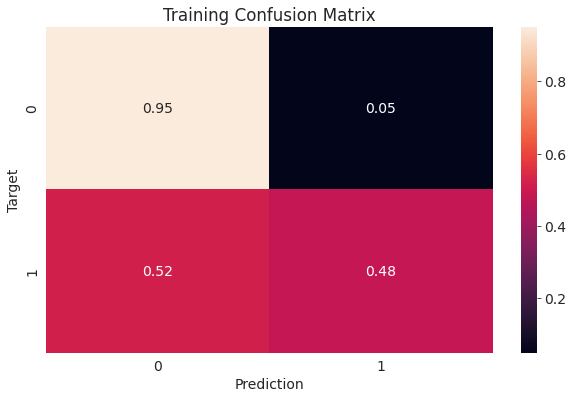

In [89]:
train_preds = predict_and_plot(x_train, train_target, "Training")

Accuracy: 84.97%


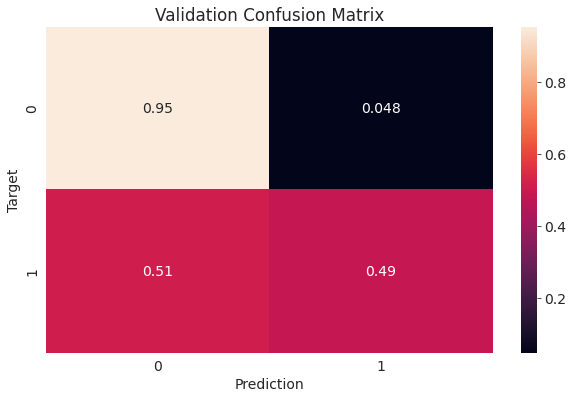

In [90]:
val_preds = predict_and_plot(x_val, val_target, "Validation")

Accuracy: 84.72%


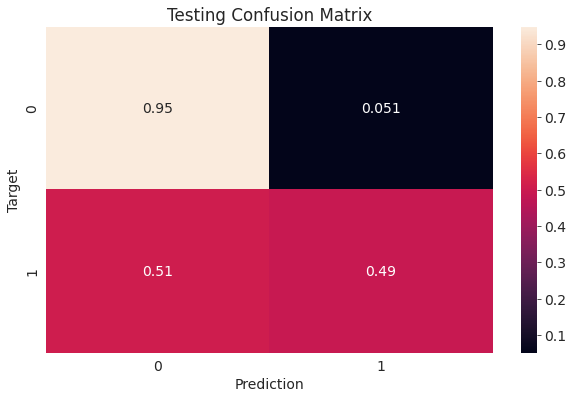

In [91]:
test_preds = predict_and_plot(x_test, test_target, "Testing")

In [92]:
new_input = {'Date': '2021-06-19',
             'Location': 'Katherine',
             'MinTemp': 23.2,
             'MaxTemp': 33.2,
             'Rainfall': 10.2,
             'Evaporation': 4.2,
             'Sunshine': np.nan,
             'WindGustDir': 'NNW',
             'WindGustSpeed': 52.0,
             'WindDir9am': 'NW',
             'WindDir3pm': 'NNE',
             'WindSpeed9am': 13.0,
             'WindSpeed3pm': 20.0,
             'Humidity9am': 89.0,
             'Humidity3pm': 58.0,
             'Pressure9am': 1004.8,
             'Pressure3pm': 1001.5,
             'Cloud9am': 8.0,
             'Cloud3pm': 5.0,
             'Temp9am': 25.7,
             'Temp3pm': 33.0,
             'RainToday': 'Yes'}

In [93]:
new_input_df = pd.DataFrame([new_input])

In [94]:
new_input_df[numerical_cols] = imputer.transform(new_input_df[numerical_cols])
new_input_df[numerical_cols] = scaler.transform(new_input_df[numerical_cols])
new_input_df[encoded_cols] = encoder.transform(new_input_df[categorical_cols])

In [95]:
x_new_input = new_input_df[numerical_cols + encoded_cols]

In [101]:
x_new_input

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,Location_Albury,Location_BadgerysCreek,Location_Cobar,Location_CoffsHarbour,Location_Moree,Location_Newcastle,Location_NorahHead,Location_NorfolkIsland,Location_Penrith,Location_Richmond,Location_Sydney,WindGustDir_E,WindGustDir_ENE,WindGustDir_ESE,WindGustDir_N,WindGustDir_NE,WindGustDir_NNE,WindGustDir_NNW,WindGustDir_NW,WindGustDir_S,WindGustDir_SE,WindGustDir_SSE,WindGustDir_SSW,WindGustDir_SW,WindGustDir_W,WindGustDir_WNW,WindGustDir_WSW,WindGustDir_nan,WindDir9am_E,WindDir9am_ENE,WindDir9am_ESE,WindDir9am_N,WindDir9am_NE,WindDir9am_NNE,WindDir9am_NNW,WindDir9am_NW,WindDir9am_S,WindDir9am_SE,WindDir9am_SSE,WindDir9am_SSW,WindDir9am_SW,WindDir9am_W,WindDir9am_WNW,WindDir9am_WSW,WindDir9am_nan,WindDir3pm_E,WindDir3pm_ENE,WindDir3pm_ESE,WindDir3pm_N,WindDir3pm_NE,WindDir3pm_NNE,WindDir3pm_NNW,WindDir3pm_NW,WindDir3pm_S,WindDir3pm_SE,WindDir3pm_SSE,WindDir3pm_SSW,WindDir3pm_SW,WindDir3pm_W,WindDir3pm_WNW,WindDir3pm_WSW,WindDir3pm_nan,RainToday_No,RainToday_Yes
0,0.811594,0.651852,0.027493,0.048724,0.544515,0.351562,0.1,0.240964,0.886598,0.575758,0.409091,0.389273,0.888889,0.625,0.679144,0.66005,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [98]:
prediction = model.predict(x_new_input)[0]

In [99]:
prediction

'Yes'

In [102]:
prob = model.predict_proba(x_new_input)[0]

In [103]:
prob

array([0.41184972, 0.58815028])

In [106]:
def predict_input(single_input):
    input_df = pd.DataFrame([single_input])
    input_df[numerical_cols] = imputer.transform(input_df[numerical_cols])
    input_df[numerical_cols] = scaler.transform(input_df[numerical_cols])
    input_df[encoded_cols] = encoder.transform(input_df[categorical_cols])
    X_input = input_df[numerical_cols + encoded_cols]
    pred = model.predict(X_input)[0]
    prob = model.predict_proba(X_input)[0][list(model.classes_).index(pred)]
    return pred, prob

In [107]:
predict_input(new_input)

('Yes', 0.5881502783318343)